<a href="https://colab.research.google.com/github/MOHAMED-ALIYAR/Image_classification_using_CNN/blob/main/image_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE CLASSIFICATION USING CNN**

In [2]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D

In [3]:
#Load the datset
from tensorflow.keras import datasets
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
print(x_test.shape)

(10000, 32, 32, 3)


In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[0]

array([6], dtype=uint8)

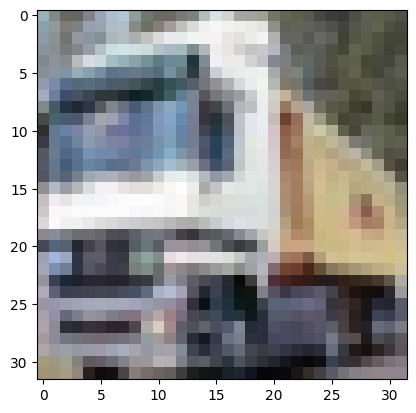

In [8]:
plt.imshow(x_train[1])

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train=y_train.reshape(-1,)

In [31]:
label=['aerplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


def img(x,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(x[index])
  plt.xlabel(label[y[index]])

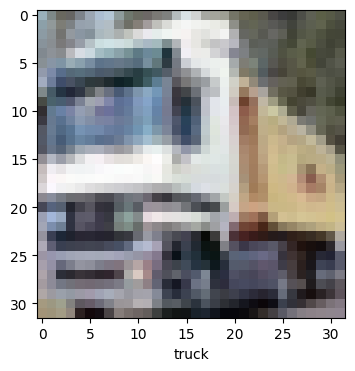

In [30]:
img(x_train,y_train,1)

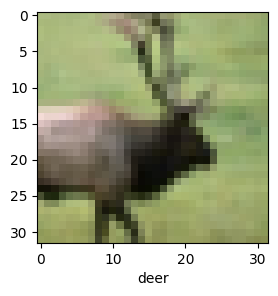

In [32]:
img(x_train,y_train,34)

In [14]:
#Normalize

x_train,x_test=x_train/255,x_test/255

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [16]:
#model
model=Sequential()

#filters
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))

In [17]:
#flatenning
model.add(Flatten())
model.add(Dense(64,activation='relu'))
#output layer
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 512)               0

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5260 - accuracy: 0.8125 - val_loss: 1.0217 - val_accuracy: 0.6902
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5057 - accuracy: 0.8194 - val_loss: 0.9622 - val_accuracy: 0.6948
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4875 - accuracy: 0.8260 - val_loss: 0.9786 - val_accuracy: 0.7046
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4704 - accuracy: 0.8313 - val_loss: 0.9847 - val_accuracy: 0.6990
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4531 - accuracy: 0.8376 - val_loss: 1.0634 - val_accuracy: 0.6938
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4371 - accuracy: 0.8434 - val_loss: 1.0325 - val_accuracy: 0.7014
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4256 - accuracy: 0.8459 - val_loss: 1.0317 - val_accuracy

(0.5, 1.0)

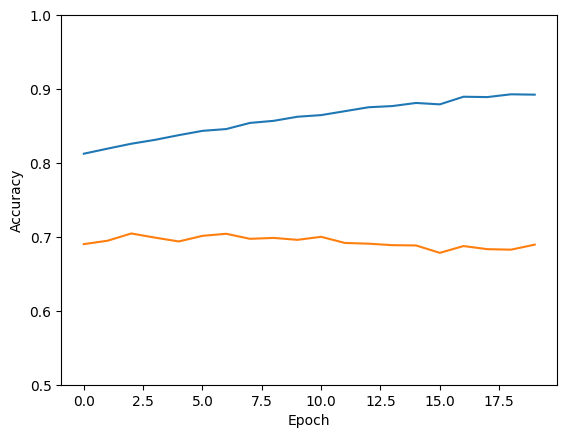

In [50]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])

In [51]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4033 - accuracy: 0.6895


[1.4032533168792725, 0.6894999742507935]

In [52]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
def img(num):
  print(label[np.argmax(y_pred[num])])
  plt.figure(figsize=(15,2))
  plt.imshow(x_test[num])
  plt.show()

horse


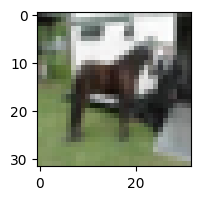

In [54]:
img(20)

horse


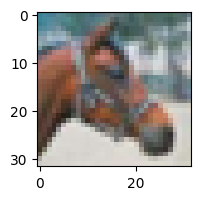

In [36]:
img(17)

truck


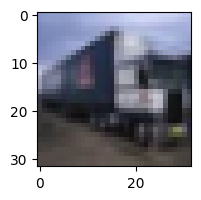

In [37]:
img(34)